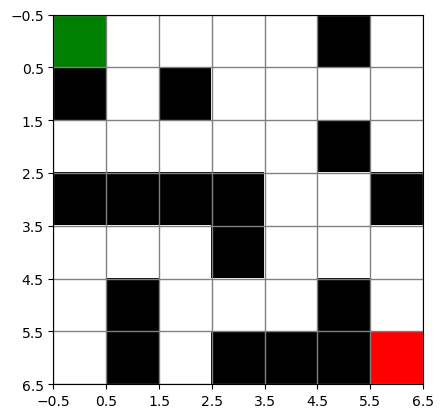

In [7]:

import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython.display import display, clear_output
import time

maze=np.array([[1,0,0,0,0,3,0],
                [3,0,3,0,0,0,0],
                [0,0,0,0,0,3,0],
                [3,3,3,3,0,0,3],
                [0,0,0,3,0,0,0],
                [0,3,0,0,0,3,0],
                [0,3,0,3,3,3,5]])

# 定義顏色映射 (用自訂 colormap)
colors = ['white', 'green' ,'blue', 'black', 'red']
cmap = ListedColormap(colors)
vmin, vmax = 0, len(colors) - 1

fig, ax = plt.subplots()
im = ax.imshow(maze, cmap=cmap, vmin=vmin, vmax=vmax)

# 添加格線
ax.grid(color='gray', linewidth=1)
ax.set_xticks(np.arange(-0.5, maze.shape[1], 1))
ax.set_yticks(np.arange(-0.5, maze.shape[0], 1))

def update_maze(new_maze):
    im.set_data(new_maze)           # 更新圖表資料
    clear_output(wait=True)         # 清除上一帧圖像
    display(fig)                    # 顯示更新後的圖像
    plt.pause(0.001)                  # 暫停一點時間，讓畫面更新



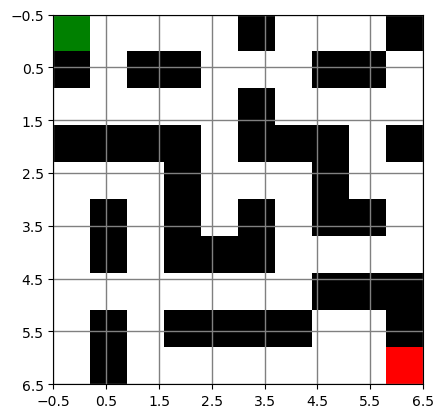

In [32]:
maze=np.array([[1,0,0,0,0,3,0,0,0,3],
               [3,0,3,3,0,0,0,3,3,0],
               [0,0,0,0,0,3,0,0,0,0],
               [3,3,3,3,0,3,3,3,0,3],
               [0,0,0,3,0,0,0,3,0,0],
               [0,3,0,3,0,3,0,3,3,0],
               [0,3,0,3,3,3,0,0,0,0],
               [0,0,0,0,0,0,0,3,3,3],
               [0,3,0,3,3,3,3,0,0,3],
               [0,3,0,0,0,0,0,0,0,5]])

update_maze(maze)

In [8]:
def move(maze_now,action):
    
    now_position = np.argwhere(maze_now == 1)
    
    if action == 0 and now_position[0][0] != 0:  #------------up move
        if maze_now[now_position[0][0]-1][now_position[0][1]] != 3:
            maze_now[now_position[0][0]][now_position[0][1]] = 0
            maze_now[now_position[0][0]-1][now_position[0][1]] = 1
            return maze_now,"pass"
        
    if action == 1 and now_position[0][0] != 6:  #------------down move
        if maze_now[now_position[0][0]+1][now_position[0][1]] != 3:
            maze_now[now_position[0][0]][now_position[0][1]] = 0
            maze_now[now_position[0][0]+1][now_position[0][1]] = 1
            return maze_now,"pass"
        
    if action == 2 and now_position[0][1] != 0:  #------------left move
        if maze_now[now_position[0][0]][now_position[0][1]-1] != 3:
            maze_now[now_position[0][0]][now_position[0][1]] = 0
            maze_now[now_position[0][0]][now_position[0][1]-1] = 1
            return maze_now,"pass"
        
    if action == 3 and now_position[0][1] != 6:  #------------right move
        if maze_now[now_position[0][0]][now_position[0][1]+1] != 3:
            maze_now[now_position[0][0]][now_position[0][1]] = 0
            maze_now[now_position[0][0]][now_position[0][1]+1] = 1
            return maze_now,"pass"
        
    return maze_now,"stuck"

def reward_calculate(maze_now,output_now):
    
    now_position = np.argwhere(maze_now == 1)
    
    reward_calc = now_position[0][0] +  now_position[0][1]
    
    if output_now == "stuck": reward_calc = -5
    
    return reward_calc

class QLearningAgent:
    def __init__(self, state_size, action_size,
                 learning_rate=0.1, discount_factor=0.9,
                 exploration_rate=1.0,
                 exploration_decay=0.98):
        self.state_size = state_size
        self.action_size = action_size
        self.learning_rate = learning_rate      # 學習率 α
        self.discount_factor = discount_factor  # 折扣因子 γ
        self.exploration_rate = exploration_rate  # 初始探索率 ε
        self.exploration_decay = exploration_decay  # 探索衰減 epsilon-decay

        # 初始化 Q-table
        self.q_table = np.zeros((state_size, action_size))

    def choose_action(self, state):
        # ε-greedy 策略：隨機探索或選擇最大 Q 值
        if np.random.rand() < self.exploration_rate:
            return random.choice(range(self.action_size))  # 隨機行動
        else:
            return np.argmax(self.q_table[state])  # 選擇最大 Q 值的行動

    def learn(self, state, action, reward, next_state, done):
        # Q-learning 更新公式
        best_next_action = np.argmax(self.q_table[next_state])
        target = reward + (1 - done) * self.discount_factor * self.q_table[next_state][best_next_action]
        self.q_table[state][action] += self.learning_rate * (target - self.q_table[state][action])

        # 逐步減少探索率
        if done:
            self.exploration_rate *= self.exploration_decay


In [10]:
# 簡單測試
state_size = 49   # 49 個狀態
action_size = 4   # 4 個可能行動（上下左右）
agent = QLearningAgent(state_size, action_size,exploration_decay=0.95,discount_factor=0.9)
done_or_not = False
move_counts = 0
complete_counts = 0
reward_list=[0]
reward = 0
failed=0
win=0

while complete_counts <50:
    move_counts = 0
    while done_or_not == False:
        
        print('epochs:'+str(complete_counts)+
              '  completes/fails:'+str(win)+
              '/'+str(failed) +'\n''epsilon:'+
              str(round(agent.exploration_rate,3))+
              '   reward_now:'+str(round(reward,2))+
              '\n'+'move_counts:'+str(move_counts))
        update_maze(maze)
        position_before = [np.argwhere(maze == 1)[0][0],np.argwhere(maze == 1)[0][1]]
        action = agent.choose_action(7*position_before[0]+position_before[1])
        maze , output = move(maze,action)
        
        position_new = [np.argwhere(maze == 1)[0][0],np.argwhere(maze == 1)[0][1]]

        
        if move_counts >70:
            reward = -10
            done_or_not = True
            complete_counts += 1
            failed+=1
        elif reward_calculate(maze,output) == 12:
            reward = 25
            done_or_not = True
            complete_counts += 1
            win+=1
        else:
            reward=reward_calculate(maze,output)
            done_or_not = False
            move_counts += 1

            
        reward -= move_counts*0.02
        
        reward_list.append(reward)
        
        agent.learn(state=7*position_before[0]+position_before[1],
                    action=action,
                    reward=reward,
                    next_state=7*position_new[0]+position_new[1],
                    done=done_or_not)
        
    maze=np.array([[1,0,0,0,0,3,0],
                    [3,0,3,0,0,0,0],
                    [0,0,0,0,0,3,0],
                    [3,3,3,3,0,0,3],
                    [0,0,0,3,0,0,0],
                    [0,3,0,0,0,3,0],
                    [0,3,0,3,3,3,5]])
    done_or_not = False

    
Q_table=agent.q_table

KeyboardInterrupt: 

In [ ]:
# 1.0 complete = 1
# 0.9 complete = 5
# 0.8 complete = 24
# 0.5 complete = 25
# 0.3 complete = 28
# 0.2 complete = 26
# 0   complete = 5

In [ ]:
# these are mazes which are very hard to use only a q-table to conquer qwq

maze=np.array([[1,0,0,0,0,3,0,0,0,3],
               [3,0,3,3,0,0,0,3,3,0],
               [0,0,0,0,0,3,0,0,0,0],
               [3,3,3,3,0,3,3,3,0,3],
               [0,0,0,3,0,0,0,3,0,0],
               [0,3,0,3,0,3,0,3,3,0],
               [0,3,0,3,3,3,0,0,0,0],
               [0,0,0,0,0,0,0,3,3,3],
               [0,3,0,3,3,3,3,0,0,3],
               [0,3,0,0,0,0,0,0,0,5]])

maze=np.array([[1,0,0,0,0,3,0],
                [3,0,3,0,0,0,0],
                [0,0,0,0,0,3,0],
                [3,3,3,3,0,0,3],
                [0,0,0,3,0,0,0],
                [0,3,0,0,0,3,0],
                [0,3,0,3,3,3,5]])

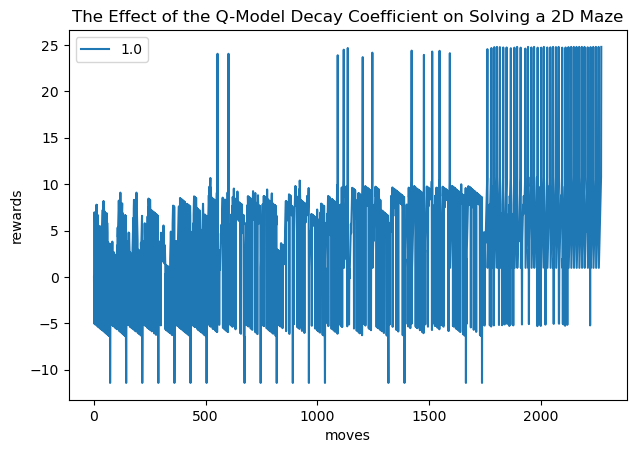

In [8]:
def show_train_history(la):
    plt.figure(figsize=(7.2,4.8))
    plt.plot(la)
    plt.title('The Effect of the Q-Model Decay Coefficient on Solving a 2D Maze')
    plt.ylabel('rewards')
    plt.xlabel('moves')
    plt.legend(['1.0'], loc='upper left')
    plt.show()

def moving_average(data, window_size=500):
# 將輸入數據轉換為 numpy array
    data = np.array(data)

    # 使用 numpy 的 convolve 函數計算移動平均
    weights = np.ones(window_size) / window_size
    moving_avg = np.convolve(data, weights, mode='valid')

    pad_size = window_size - 1
    # 在開頭和結尾填充 NaN 或其他值（這裡用 NaN）
    pad_width = (pad_size // 2, pad_size - pad_size // 2)
    moving_avg = np.pad(moving_avg, pad_width, mode='constant', constant_values=np.nan)
                        
    return moving_avg

show_train_history(moving_average(reward_list,1))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.lines as lines
from collections import Counter

def replace(row, old_v, new_v):
    for i, v in enumerate(row):
        if v == old_v:
            row[i] = new_v

def ellers_algorithm(height, width, prob=0.5):
    maze = [[0]*width for _ in range(height)]
    areas = [i for i in range(width)]
    next_area = width

    for i in range(height):
        # Horizontal connections
        for j in range(width-1):
            # no wall (connect areas)
            if areas[j] != areas[j+1] and random.random() > prob:
                replace(areas, areas[j+1], areas[j])
            # build wall
            else:
                maze[i][j] |= 1
        
        # Last row (connect all areas)
        if i == height-1:
            for j in range(width-1):
                if areas[j] != areas[j+1]:
                    replace(areas, areas[j+1], areas[j])
                    maze[i][j] &= ~1
            break

        # Vertical connections
        area_count = Counter(areas)
        for j, cell in enumerate(areas):
            # build wall
            if area_count[cell] > 1 and random.random() < prob:
                area_count[cell] -= 1
                areas[j] = next_area
                next_area += 1
                maze[i][j] |= 2

    return maze

def line(x1, x2, y1, y2, color='black'):
    return lines.Line2D([x1, x2], [y1, y2], color=color, linewidth=2)

def plot_maze(maze):
    height, width = len(maze), len(maze[0])
    fig, ax = plt.subplots()

    # boarder
    ax.add_line(line(0, 0, 0, height))
    ax.add_line(line(0, width, 0, 0))
    ax.add_line(line(width, width, 0, height))
    ax.add_line(line(0, width, height, height))

    for i in range(height):
        for j in range(width):
            if maze[i][j] & 1:  # Wall to the right
                ax.add_line(line(j+1, j+1, height-i-1, height-i))
            if maze[i][j] & 2:  # Wall below
                ax.add_line(line(j, j+1, height-i-1, height-i-1))

    ax.set_xlim(0, width)
    ax.set_ylim(0, height)
    ax.set_aspect('equal')
    ax.axis('off')
    
    return fig, ax

print(np.array(ellers_algorithm(10,10)))

plot_maze(np.array(ellers_algorithm(10,10)))
